In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords

In [8]:
df_train = pd.read_csv(r"C:\Users\Pradheeba\OneDrive\Documents\prodigy4\twitter_training.csv", header = None)
df_train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
# Renaming the columns for better understanding
df_train.columns = ['ID', 'Category', 'Sentiment', 'Text']

In [10]:
df_train.columns

Index(['ID', 'Category', 'Sentiment', 'Text'], dtype='object')

In [11]:
df_test = pd.read_csv(r"C:\Users\Pradheeba\OneDrive\Documents\prodigy4\twitter_validation.csv", header = None)
df_test.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [12]:
df_test.columns = ['ID', 'Category', 'Sentiment', 'Text']
df_test.columns

Index(['ID', 'Category', 'Sentiment', 'Text'], dtype='object')

In [13]:
df_train.isnull().sum()

ID             0
Category       0
Sentiment      0
Text         686
dtype: int64

In [14]:
df_test.isnull().sum()

ID           0
Category     0
Sentiment    0
Text         0
dtype: int64

In [15]:
df_train = df_train.dropna()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pradheeba\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [16]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def remove_symbols(text):
    pattern = r'[^A-Za-z\s]'
    text = re.sub(pattern, '', text)
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return text

# Clean text column
df_train['Text'] = df_train['Text'].apply(lambda x: remove_html_tags(x))
df_train['Text'] = df_train['Text'].apply(lambda x: remove_symbols(x))

df_test['Text'] = df_test['Text'].apply(lambda x: remove_html_tags(x))
df_test['Text'] = df_test['Text'].apply(lambda x: remove_symbols(x))

C:\Users\Pradheeba\AppData\Local\Temp\ipykernel_13560\3822377628.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [17]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train = df_train['Text']
y_train = df_train.Sentiment

X_test = df_test['Text']
y_test = df_test.Sentiment
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

Accuracy: 95.0%
Precision: 0.9499613517158275
Recall: 0.95
F1 Score: 0.9499489254629533

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.94      0.95      0.94       172
    Negative       0.96      0.97      0.96       266
     Neutral       0.95      0.96      0.96       285
    Positive       0.94      0.93      0.94       277

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



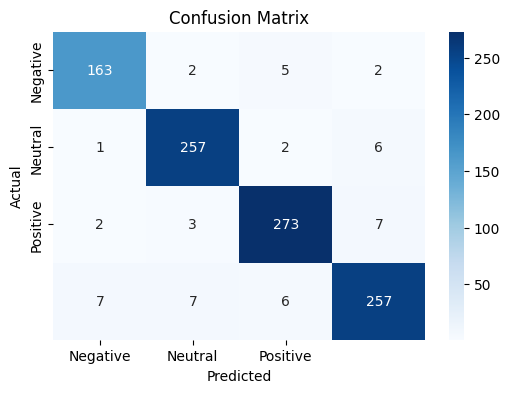

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy * 100, 2)}%')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()